# Прогнозирование вероятности оттока пользователей для фитнес-центров

## Задача: 

Провести анализ и подготовить план действий по удержанию клиентов:

* спрогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
* сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
* проанализировать основные признаки, наиболее сильно влияющие на отток;
* сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:

    1) выделить целевые группы клиентов;
    
    2) предложить меры по снижению оттока;
    
    3) определить другие особенности взаимодействия с клиентами.

## Исходные данные:

Набор данных включает следующие поля:
* 'Churn' — факт оттока в текущем месяце;

**Данные клиента за предыдущий до проверки факта оттока месяц:**
* 'gender' — пол;
* 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
* 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* 'Phone' — наличие контактного телефона;
* 'Age' — возраст;
* 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

**Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:**
* 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
* 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
* 'Group_visits' — факт посещения групповых занятий;
* 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
* 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
* 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

## План выполнения проекта:


<a href='#step_1'>Шаг 1. Загрузка данных. </a>

<a href='#step_2'>Шаг 2.Исследовательский анализ данных (EDA)</a>
<ul>
    <li>
        <a href='#step_2.1'>1) Посмотрим на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения</a>
    </li>    <li>
        <a href='#step_2.2'>2) Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался </a>
    </li>    <li>
        <a href='#step_2.3'>3) Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток) </a>
    </li>    <li>
        <a href='#step_2.4'>4) Построим матрицу корреляций и отобразим её </a>
    </li>    <li>
        <a href='#step_2.5'>5) Выводы</a>
    </li> 
</ul>

<a href='#step_3'>Шаг 3. Модель прогнозирования оттока клиентов</a>
<ul>
    <li>
        <a href='#step_3.1'>1) Посмотроение модель</a>
    </li>    <li>
        <a href='#step_3.2'>2) Выводы </a>
    </li> 
</ul>   

<a href='#step_4'>Шаг 4. Кластеризация клиентов </a>
<ul>
    <li>
        <a href='#step_4.1'>1) Стандартизируем данные </a>
    </li>    <li>
        <a href='#step_4.2'>2) Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму</a>
    </li>    <li>
        <a href='#step_4.3'>3) Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов </a>
    </li>    <li>
        <a href='#step_4.4'>4) Посмотрим на средние значения признаков для кластеров. Можно ли сразу что-то заметить?</a>
    </li>    <li>
        <a href='#step_4.5'>5) Построим распределения признаков для кластеров. Можно ли что-то заметить по ним?</a>
    </li>    <li>
        <a href='#step_4.6'>6) Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?</a>
    </li>    <li>
        <a href='#step_4.7'>7) Выводы </a>
    </li> 
</ul>    

<a href='#step_5'>Шаг 5. Выводы и базовые рекомендации по работе с клиентами</a>

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt

from scipy import stats as st
import math as mth

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

<a id='step_1'></a>
## Шаг 1. Загрузка данных

In [2]:
df = pd.read_csv('/datasets/gym_churn.csv')  #прочитаем файл csv и сохраним данные в таблицу df.

In [3]:
df.head(10) #напечатаем первые 10 строк таблицы df

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


In [4]:
df.columns = df.columns.str.lower() #Заменим названия столбцов, приведем к нижнему регистру

<a id='step_2'></a>
## Шаг 2. Исследовательский анализ данных (EDA)

<a id='step_2.1'></a>
### 1) Посмотрим на датасет: есть ли в нем отсутствующие признаки, изучим средние значения и стандартные отклонения

In [5]:
df.info() #вызовем метод info() для получения данных о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
near_location                        4000 non-null int64
partner                              4000 non-null int64
promo_friends                        4000 non-null int64
phone                                4000 non-null int64
contract_period                      4000 non-null int64
group_visits                         4000 non-null int64
age                                  4000 non-null int64
avg_additional_charges_total         4000 non-null float64
month_to_end_contract                4000 non-null float64
lifetime                             4000 non-null int64
avg_class_frequency_total            4000 non-null float64
avg_class_frequency_current_month    4000 non-null float64
churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [6]:
df.isnull().sum() #проверим данные на наличие пропусков вызовом методов isnull() и sum() для суммирования пропущенных значений

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

In [7]:
df.duplicated().sum()  #подсчитаем количества дубликатов в df

0

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


#### Выводы:

Таблица с исходными данными содержит 4000 строк и 14 столбцов. Тип данных int64 и float64 (это верно). В исходных данных отсутствуют пропущенные значения, также отсутствуют дубликаты.

Методом describe() изучили средние значения и стандартные отклонения. Сильный разброс данных в столбцах contract_period, avg_additional_charges_total, month_to_end_contract, lifetime (среднее значение больше медианы).

Переменные имеют очень разные по величине стандатные отклонения (например: Age и Avg_additional_charges_total), поэтому перед обучением модели необходимо будет стандартизировать переменные.

Также на основе полученных средних значений переменных можно составить **портрет среднестатистических клиентов фитнес-центра**:
* среди клиентов в равной степени представленны и женщины и мужчины;
* клиенты проживают или работают в районе фитнес-центра;
* почти половина клиентов являются сотрудниками компании-партнёров клуба;
* 31% клиентов пришли по акции "приведи друга";
* почти все клиенты указывают номер телефона;
* в среднем длительность текущего действующего абонемента составляет 4.7 месяцев;
* 41% клиентов посещают групповые занятия;
* средний возраст клиентов 29 лет;
* в среднем суммарная выручка от других услуг фитнес-центра клиентов составляет 147.9;
* в среднем срок до окончания текущего действующего абонемента составляет 4.3 месяца;
* время с момента первого обращения в фитнес-центр - 3.7 месяцев;
* средняя частота посещений в неделю за все время с начала действия абонемента - 1.9 посещений
* средняя частота посещений в неделю за предыдущий месяц - 1.8 посещений.

<a id='step_2.2'></a>
### 2) Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйемся методом groupby())

In [9]:
df_group = df.groupby('churn')[df.drop('churn', axis = 1).columns].mean().transpose()
df_group

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


#### Выводы:

Но основе данных о средних значениях признаков в друх группах, получили:
* те, кто живет или работает в районе, где находится фитнес-центр реже уходят в отток, что ожидаемо;
* те, кто является сотрудником компании-партнёра клуба чаще продолжают посещать фитнес-центр; 
* те, кто пришел в рамках акции «приведи друга»  реже уходят в отток;
* у тех, кто остался больше длительность текущего действующего абонемента - 5.7 месяцев (у тех кто ушел - 1.7 месяцев);
* те, кто остался почти в 2 раза чаще посещали групповые занятия;
* у тех, кто остался больше средний возраст (30 против 26);
* те, кто остался принесли больше суммарной выручки от других услуг фитнес-центра - 158.4 (у тех кто ушел - 115.1);
* у тех, кто остался больше срок до окончания текущего действующего абонемента - 5.3 месяцев (у тех кто ушел - 1.7 месяцев);
* у тех, кто остался прошло больше времени с момента первого обращения в фитнес-центр - 4.7 месяцев (у тех кто ушел - 1 месяц)
* у тех, кто остался больше средняя частота посещений в неделю за все время с начала действия абонемента и средняя частота посещений в неделю за предыдущий месяц - 2 раза (у тех кто ушел частота посещения ниже и в среднем составляет 1.4 и 1 раза соответственно)

Данные по полу и наличию контактного телефона не отличаются.

<a id='step_2.3'></a>
### 3) Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

In [10]:
# Сохраним название столбцов с признаками
columns_name = df.drop('churn', axis = 1).columns
columns_name

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month'],
      dtype='object')

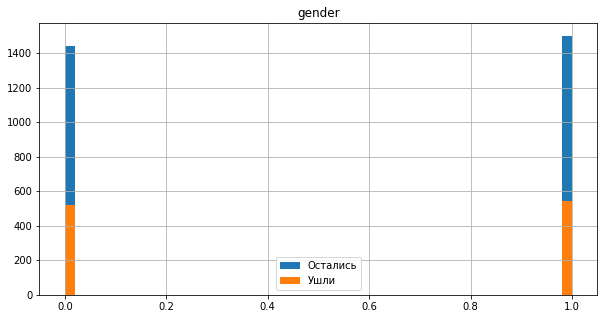

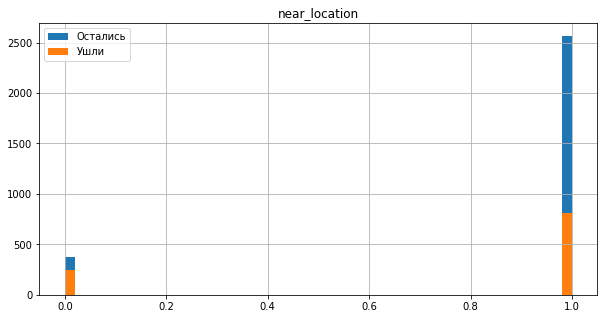

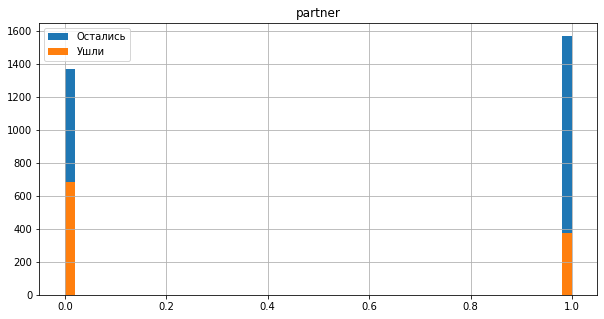

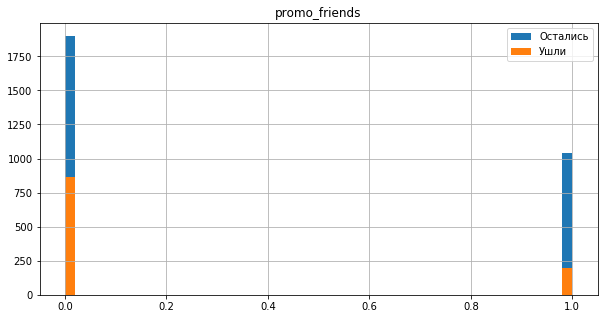

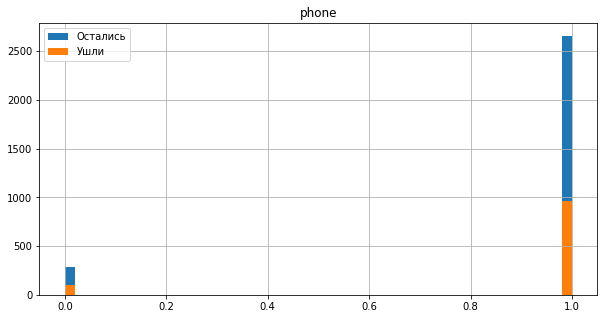

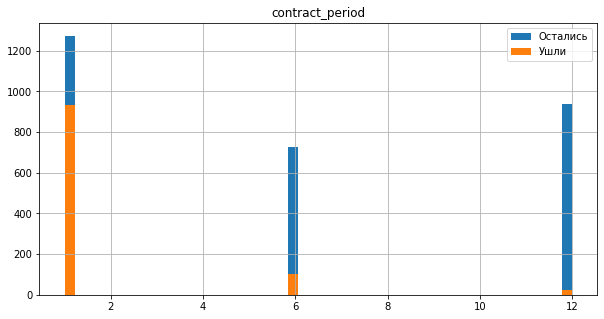

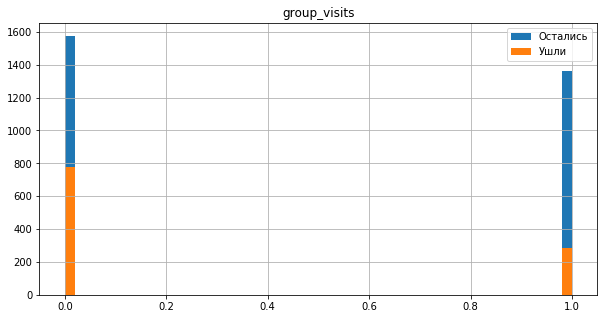

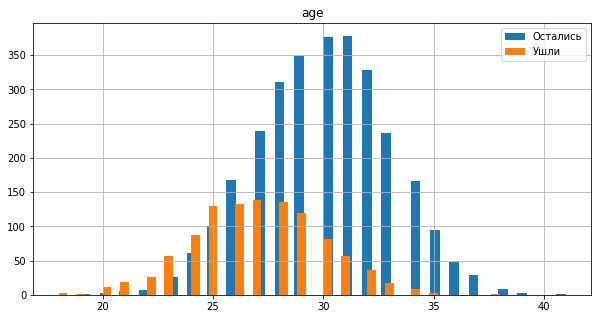

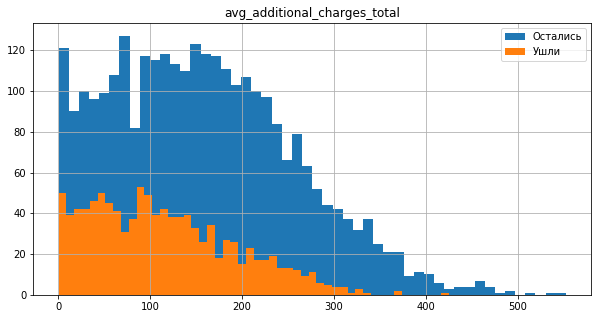

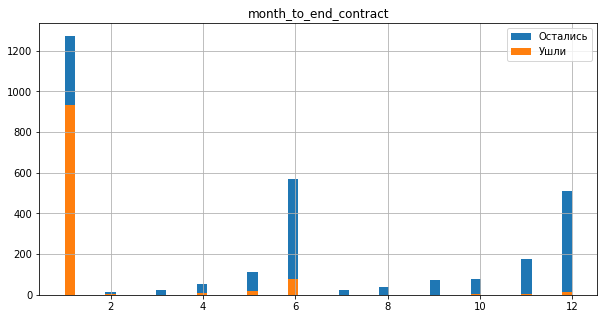

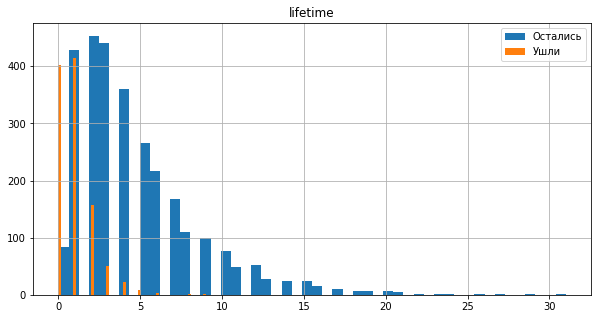

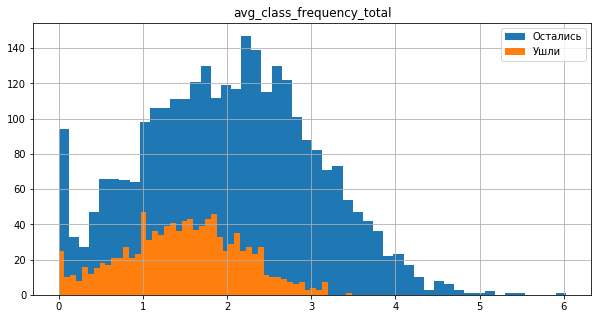

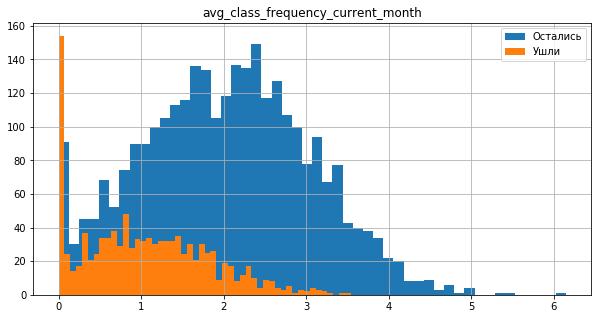

In [11]:
for column in columns_name:
    plt.figure(figsize=(10, 5)) 
    df.groupby('churn')[column].hist(bins=50)
    plt.title(column)
    plt.legend(['Остались', 'Ушли'])
    plt.show()

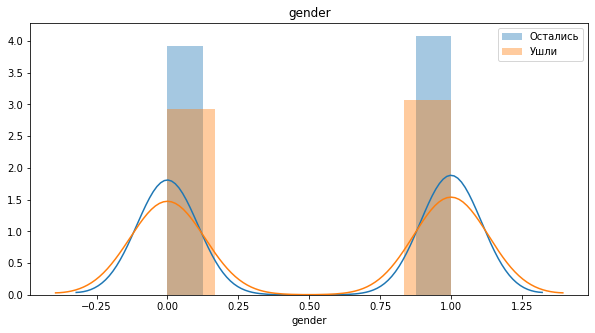

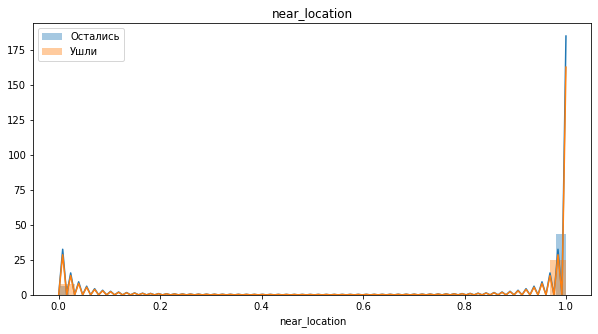

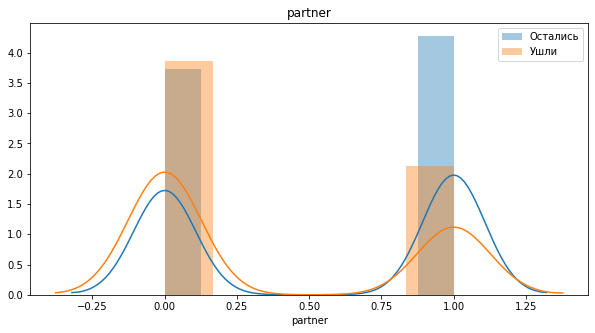

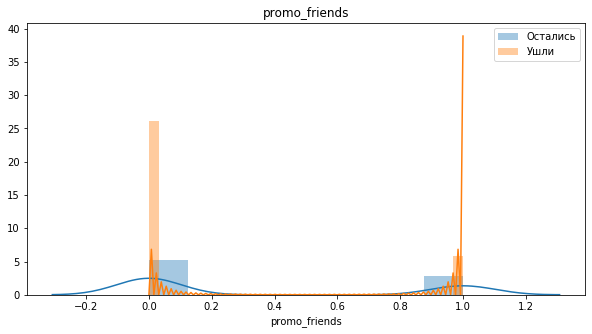

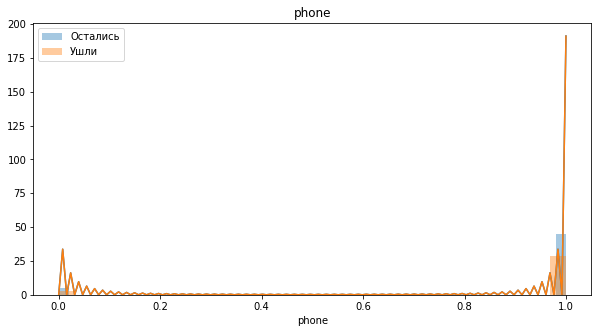

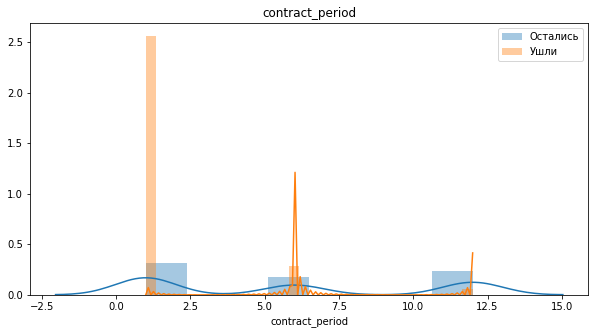

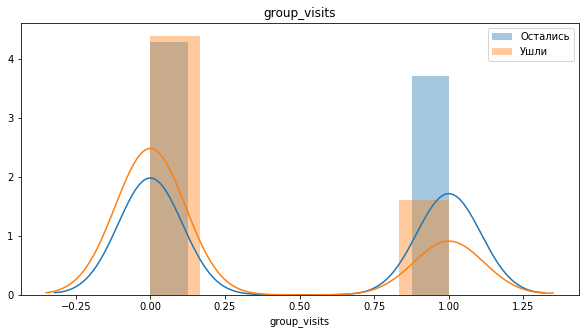

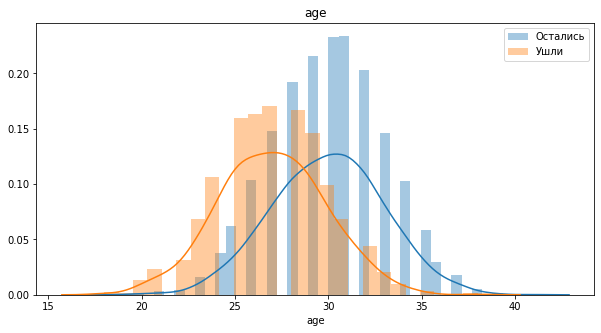

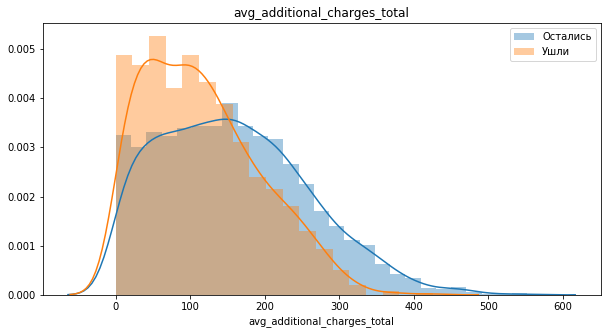

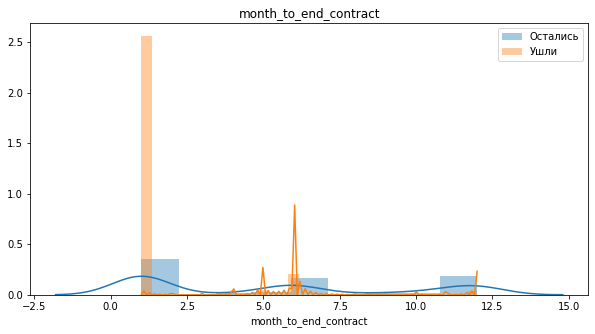

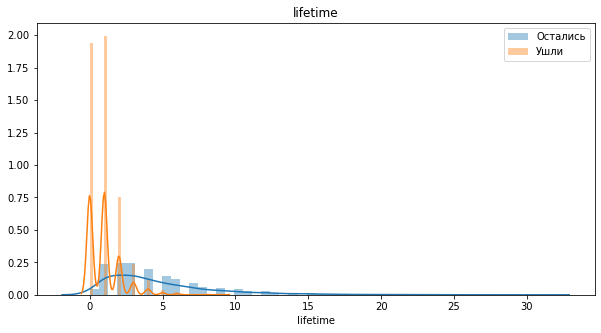

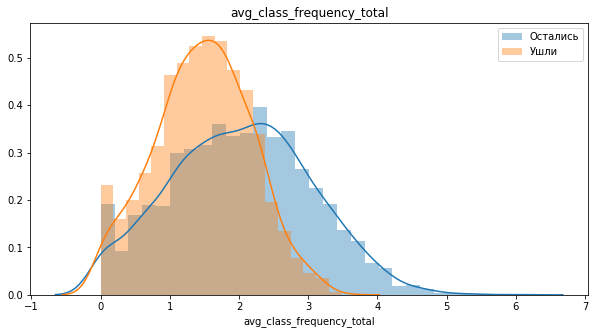

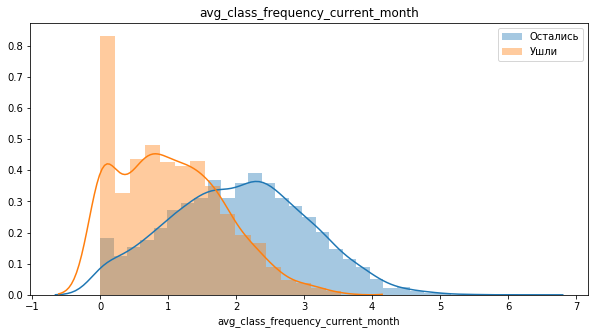

In [12]:
# Построим также графики distplot
for column in columns_name:
    plt.figure(figsize=(10,5))
    plt.title(column)
    sns.distplot(df[df['churn'] == 0][column])
    sns.distplot(df[df['churn'] == 1][column])
    plt.legend(['Остались', 'Ушли'])
    plt.show()

#### Выводы:

Построеннные графики подтверждают выводы сделанные выше.

<a id='step_2.4'></a>
### 2.4 Построим матрицу корреляций и отобразим её

In [13]:
cm = df.corr()
cm

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


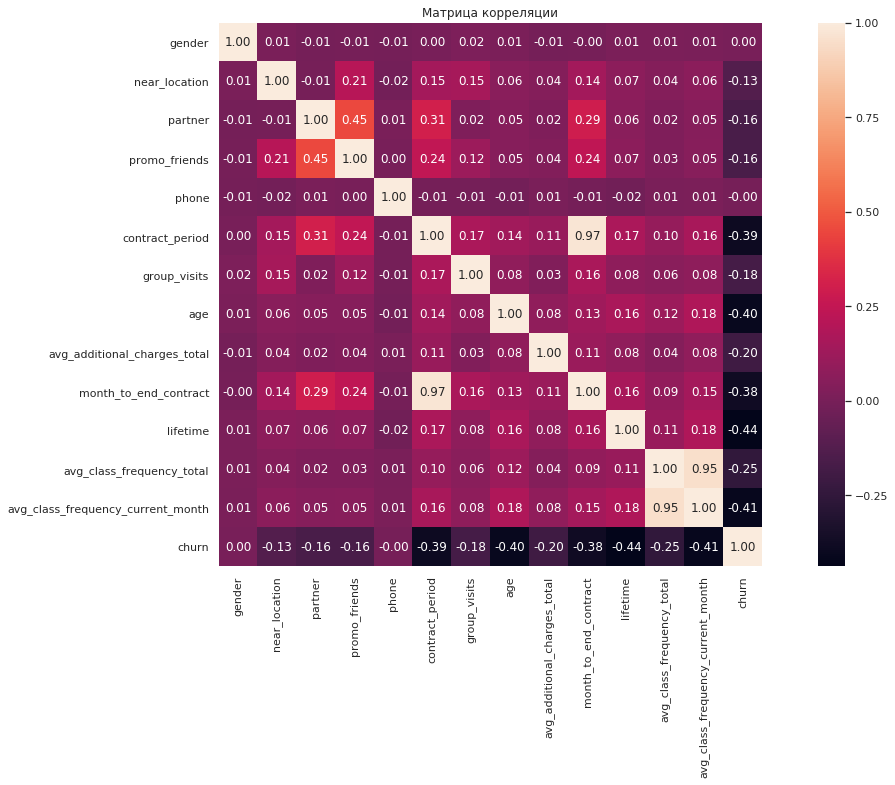

In [14]:
sns.set(style='white')
plt.figure(figsize=(20, 10))
plt.title('Матрица корреляции')
sns.heatmap(cm, fmt='.2f', annot = True, square=True);

<a id='step_2.5'></a>
### 5) Выводы

На основе матрици корреляции видим, что очень сильно коррелируют признаки contract_period и month_to_end_contract (корреляция = 0.97), а также avg_class_frequency_total и avg_class_frequency_current_month (корреляция = 0.95). Эти признаки являются мультиколлинеарными.

Часть признаков имееют небольшую положительную корреляцию:
* признак "проживание или работа в районе финтес-центра" (near_location) и признака "пришли в рамках акции «приведи друга»" (promo_friends);
* признак "сотрудник компании-партнёра клуба" (partner) и признаки "пришли в рамках акции «приведи друга»" (promo_friends), "длительность текущего действующего абонемента" (contract_period) и "срок до окончания текущего действующего абонемента" (month_to_end_contract).

Признаки пол и наличие контактного телефона не коррелирует с другими признаками и также не коррелирует с целевой переменной churn.

<a id='step_3'></a>
## Шаг 3. Модель прогнозирования оттока клиентов

<a id='step_3.1'></a>
### 1) Построение модели

**Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:**

1) Разбъем данные на обучающую и валидационную выборку функцией train_test_split().

2) Обучим модель на train-выборке двумя способами:
   * логистической регрессией,
   * случайным лесом.

3) Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравним по ним модели. Какая модель показала себя лучше на основании метрик?

In [15]:
# определим функцию, которая будет выводить наши метрики
def print_all_metrics(y_true, y_pred, y_proba, title = 'Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.3f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.3f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.3f}'.format(recall_score(y_true, y_pred)))

In [16]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = df.drop('churn', axis = 1)
y = df['churn']

In [17]:
# разделим модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
# обучим StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [19]:
# Преобразуем обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [20]:
# зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression()

In [21]:
# обучим модель
lr_model.fit(X_train_st, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]

In [23]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)

In [24]:
# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [25]:
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

In [26]:
# выведем все метрики
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Метрики для модели логистической регрессии:')
print_all_metrics(y_test, rf_predictions, rf_probabilities, title = 'Метрики для модели случайного леса:')

Метрики для модели логистической регрессии:
	Accuracy: 0.922
	Precision: 0.854
	Recall: 0.828
Метрики для модели случайного леса:
	Accuracy: 0.915
	Precision: 0.839
	Recall: 0.813


<a id='step_3.2'></a>
### 2) Выводы:

Мы оценили метрики accuracy, precision и recall для модели логистической регрессии и модели случайного леса на валидационной выборке. На основании полученных значений можно сделать вывод, что лучше показала себя **модель логистической регрессии**.

<a id='step_4'></a>
## Шаг 4. Кластеризация клиентов

<a id='step_4.1'></a>
### 1) Стандартизируем данные:

In [27]:
# стандартизируем данные
sc = StandardScaler()
X_sc = sc.fit_transform(X)

<a id='step_4.2'></a>
### 2) Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму:

In [28]:
# Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков
linked = linkage(X_sc, method = 'ward') 

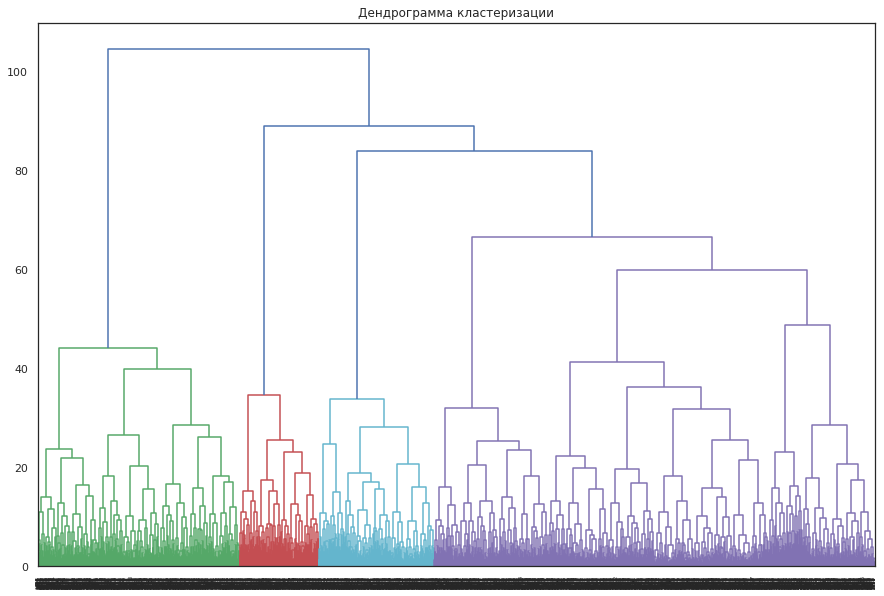

In [29]:
# Нарисуем дендрограмму
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Дендрограмма кластеризации')
plt.show() 

**На основании полученного графика оптимальное число кластеров 4 — четыре разных цвета на графике. Но согласно ТЗ за число кластеров принем n=5**

<a id='step_4.3'></a>
### 3) Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов:

In [30]:
# задаём модель k_means с числом кластеров 5
km = KMeans(n_clusters = 5, random_state=0)

In [31]:
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 4)
labels = km.fit_predict(X_sc)

In [32]:
# сохраняем метки кластера в поле нашего датасета
df['cluster_km'] = labels

In [33]:
df.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn,cluster_km
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,1
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,3
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,3


<a id='step_4.4'></a>
### 4) Посмотрим на средние значения признаков для кластеров. Можно ли сразу что-то заметить?

In [34]:
# выводим статистику по средним значениям наших признаков по кластеру
df.drop('churn', axis = 1).groupby(['cluster_km']).mean().transpose()

cluster_km,0,1,2,3,4
gender,0.502473,0.522078,0.495050,0.485737,0.560335
near_location,0.959446,0.862338,0.000000,1.000000,0.976105
partner,0.783383,0.470130,0.463366,0.350238,0.356033
promo_friends,0.574679,0.306494,0.079208,0.240095,0.229391
phone,1.000000,0.000000,1.000000,1.000000,0.998805
contract_period,10.884273,4.787013,2.352475,1.948494,2.665472
group_visits,0.543027,0.425974,0.215842,0.341521,0.473118
age,29.980218,29.301299,28.477228,28.167987,30.127838
avg_additional_charges_total,160.706969,143.957664,135.457501,131.622204,161.724258
month_to_end_contract,9.950544,4.475325,2.198020,1.856577,2.455197


### На основании средних значений признаков по кластерам можно выделить следующие особенности:

**Кластер 0:**
* существенной разницы по полу нет;
* 95.9% проживают или работают в районе, где находится фитнес-центр;
* самая большая доля (78.3%) тех, кто является сотрудниками компаний - партнёров клуба;
* самая большая доля (57.5%) тех, кто пришел в рамках акции "приведи друга";
* у всех указан номер телефона; 
* имеют самую большую длительность текущего действующего абонемента (10 месяцев);
* самая большая доля (54.3%) тех, кто посещал групповые занятий;
* средний возраст 30 лет;
* суммарная выручка от других услуг фитнес-центра составляет 160.7;
* самый большой срок до окончания текущего действующего абонемента и в среднем составляет почти 10 месяцев;
* среднее время с момента первого обращения в фитнес-центр - 4.7 месяцев;
* средняя частота посещений в неделю за все время с начала действия абонемента - 1.98;
* средняя частота посещений в неделю за предыдущий месяц - 1.97.

**Кластер 1:**
* существенной разницы по полу нет;
* 86.2% проживают или работают в районе, где находится фитнес-центр;
* 47% являются сотрудниками компаний - партнёров клуба;
* 30.6% пришли в рамках акции "приведи друга";
* ни у кого не указан номер телефона; 
* длительность текущего действующего абонемента - 4.8 месяцев;
* 42.6% посещали групповые занятия;
* средний возраст 29 лет;
* суммарная выручка от других услуг фитнес-центра составляет 144;
* срок до окончания текущего действующего абонемента в среднем составляет 4.5 месяца;
* среднее время с момента первого обращения в фитнес-центр - 3.9 месяцев;
* средняя частота посещений в неделю за все время с начала действия абонемента - 1.85;
* средняя частота посещений в неделю за предыдущий месяц - 1.72.


**Кластер 2:**
* существенной разницы по полу нет;
* не проживают и не работают в районе, где находится фитнес-центр;
* 46.3% являются сотрудниками компаний - партнёров клуба;
* Почти никто не пришли в рамках акции "приведи друга";
* у всех указан номер телефона; 
* длительность текущего действующего абонемента - 2.4 месяцев;
* 21.6% посещали групповые занятия;
* средний возраст 28 лет;
* суммарная выручка от других услуг фитнес-центра составляет 135.5;
* срок до окончания текущего действующего абонемента в среднем составляет 2.2 месяца;
* среднее время с момента первого обращения в фитнес-центр - 2.8 месяцев;
* средняя частота посещений в неделю за все время с начала действия абонемента - 1.66;
* средняя частота посещений в неделю за предыдущий месяц - 1.48.

**Кластер 3:**
* существенной разницы по полу нет;
* все проживают или работают в районе, где находится фитнес-центр;
* 35% являются сотрудниками компаний - партнёров клуба;
* 24% пришли в рамках акции "приведи друга";
* у всех указан номер телефона; 
* длительность текущего действующего абонемента - 1,9 месяцев - самый низкий показатель среди кластеров;
* 34,2% посещали групповые занятия;
* средний возраст 28 лет;
* У кластера 3 **самые низкие показатели** по следующим признакам:
    * суммарная выручка от других услуг фитнес-центра составляет 131.6;
    * срок до окончания текущего действующего абонемента в среднем составляет 1.86 месяца;
    * среднее время с момента первого обращения в фитнес-центр - 2.4 месяцев;
    * средняя частота посещений в неделю за все время с начала действия абонемента - 1.24;
    * средняя частота посещений в неделю за предыдущий месяц - 1.01.

**Кластер 4:**
* существенной разницы по полу нет;
* 97.6% проживают или работают в районе, где находится фитнес-центр;
* 35.6% являются сотрудниками компаний - партнёров клуба;
* 22,9% пришли в рамках акции "приведи друга";
* почти у всех указан номер телефона; 
* длительность текущего действующего абонемента - 2.7 месяцев;
* 47.3% посещали групповые занятия - самый низкий показатель среди кластеров;
* средний возраст 30 лет;
* суммарная выручка от других услуг фитнес-центра составляет 161.7;
* срок до окончания текущего действующего абонемента в среднем составляет 2.5 месяца;
* среднее время с момента первого обращения в фитнес-центр - 4.9 месяцев;
* У кластера 4 **самые высокие показатели** по следующим признакам:
    * средняя частота посещений в неделю за все время с начала действия абонемента - 2.85;
    * средняя частота посещений в неделю за предыдущий месяц - 2.85.

<a id='step_4.5'></a>
### 5) Построим распределения признаков для кластеров. Можно ли что-то заметить по ним?

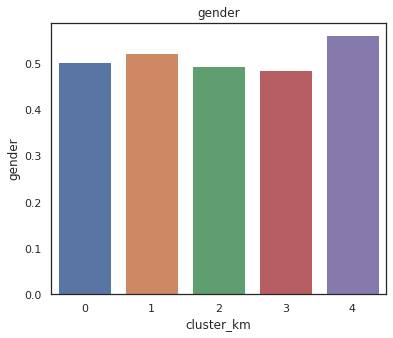

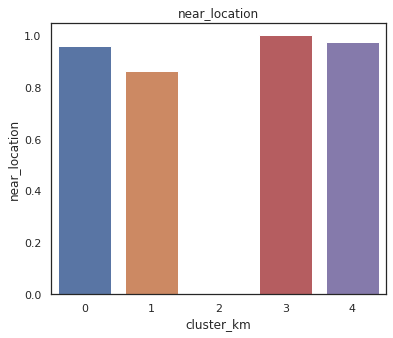

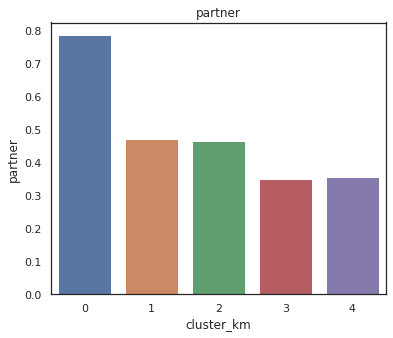

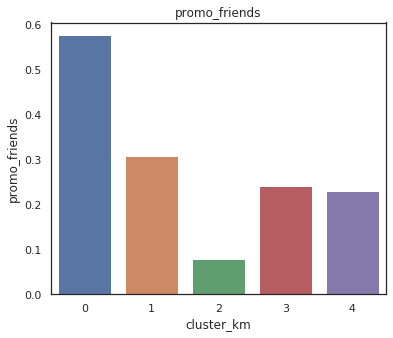

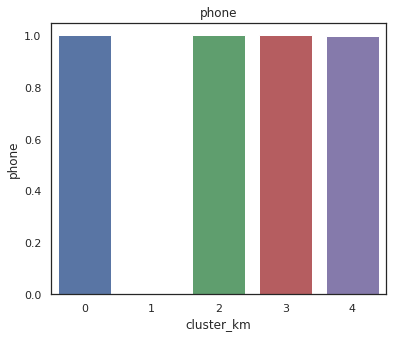

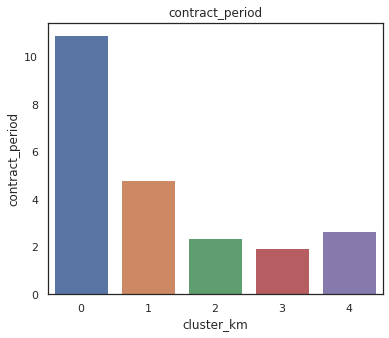

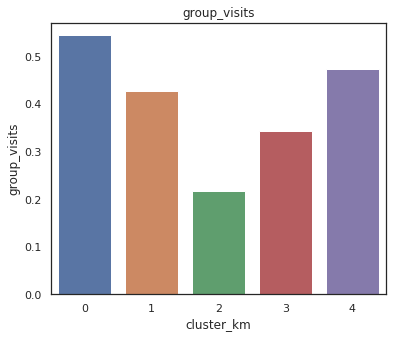

In [35]:
# Для логических и дискретных переменных построим столбчатые диаграммы
for column in ['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits']:
    plt.figure(figsize=(6, 5)) 
    sns.barplot(x="cluster_km", y=column, data=df, ci=None, palette='deep')
    plt.title(column)
    plt.show()

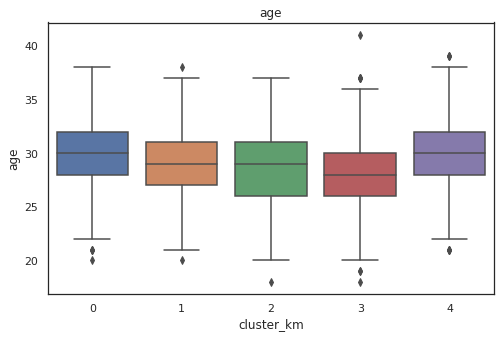

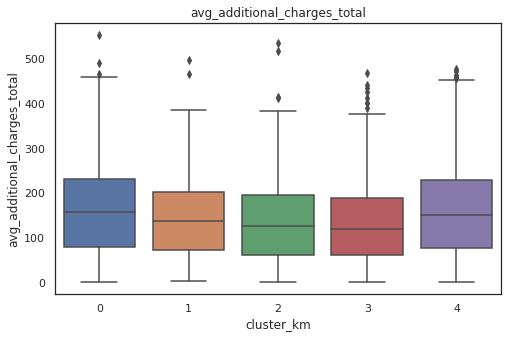

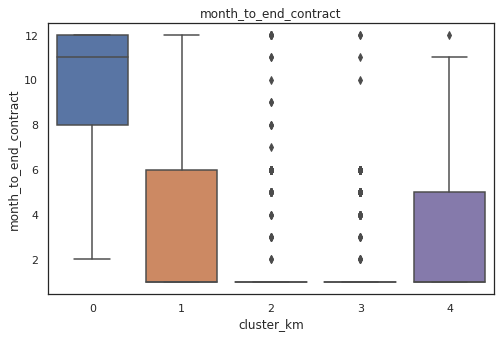

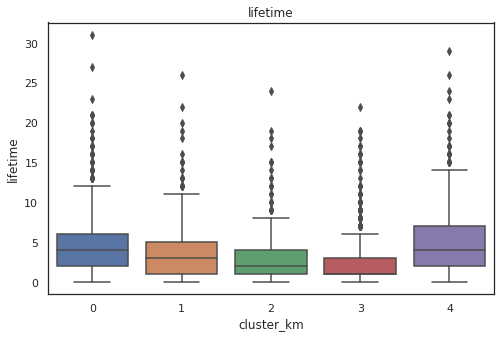

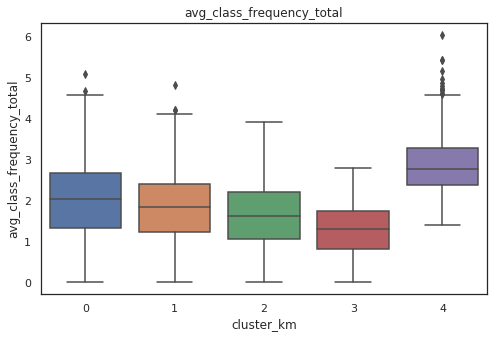

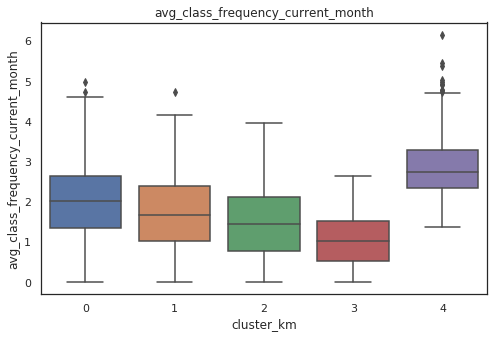

In [36]:
# Для непрерывных переменных построим boxplot
for column in ['age','avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month']:
    plt.figure(figsize=(8, 5)) 
    sns.boxplot(x="cluster_km", y=column, data=df, palette='deep')
    plt.title(column)
    plt.show()

**Выводы:**

На основе полученных графиков можно сделать следующие выводы по кластерам:
* по полу различий нет;
* клиенты всех кластеров, кроме 2-ого, проживают или работаю в районе фитнес центра;
* больше всего клиентов партнеров фитнес-центра в Кластере 0;
* больше всего клиентов, которые пришли по акции «приведи друга» в Кластере 0, меньше всех - в Кластере 2;
* все, кроме клиентов Кластера 1, указали номер телефона;
* больше всех длительность текущего действующего абонемента у клиентов Кластера 0 - 11 месяцев, у Кластеров 2, 3, 4 около 2х месяцев; 
* клиенты Кластеров 0, 1 и 4 чаще посещают групповые занятия, а клиенты Кластера 2 реже всех посещали групповые занятия;
* возраст клиентов от 25 до 35 лет;
* в среднем тратят на доп.услуги от 100 до 250;
* самый большой показатель времени с момента первого обращения в фитнес-центр у Кластеров 0 и 4. Эти клиенты дольше пользуются услугами фитнес-центра;
* среднее кол-во посещений в неделю от 1 до 2. У Кластера 4 самое большой показатель посещаемости в неделю - в среднем около 3х.

<a id='step_4.6'></a>
### 6) Для каждого полученного кластера посчитаем долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

In [37]:
churn_for_cluster = df.groupby(['cluster_km']).mean()['churn']
churn_for_cluster

cluster_km
0    0.027695
1    0.267532
2    0.443564
3    0.514263
4    0.068100
Name: churn, dtype: float64

#### Выводы:

Доля оттока клиентов по кластерам сильно отличаеся и составляет:
* Кластер 0 - 2.8%;
* Кластер 1 - 26.8%;
* Кластер 2 - 44.4%;
* Кластер 3 - 51.4%;
* Кластер 4 - 6.8%.

Минимальный отток клиентов у Кластера 0 и Кластера 4. Самый большое показатель оттока у Кластера 3 - 51.4%

<a id='step_4.7'></a>
### 7) Выводы:

**Надёжные кластеры**: Кластер 0, Кластер 4 и в меньшей степени Кластер 1.

Для кластеров не склонных к оттоку клиентов характерно:
       
   * Кластер 0 - отток 2.8%:
        - самая большая доли тех, кто: является сотрудниками компаний - партнёров клуба,пришли в рамках акции "приведи друга", посещали групповые занятий;
        - высокий показатель времени с момента первого обращения в фитнес-центр;
        - почти все проживают или работают в районе, где находится фитнес-центр.

   * Кластер 4 - отток 6.8%:
        - самые высокие показатели средней частота посещений в неделю;
        - почти все проживают или работают в районе, где находится фитнес-центр;
        - высокий показатель времени с момента первого обращения в фитнес-центр;
        - большая доля тех, кто посещал групповые занятий и являются сотрудниками компаний - партнёров клуба.
 
   * Кластер 1 - отток 26.8%:
        - большая доля проживает или работают в районе, где находится фитнес-центр;
        - большая доли тех, кто: является сотрудниками компаний - партнёров клуба,пришли в рамках акции "приведи друга", посещали групповые занятий.        
        

**Кластеры склонные к оттоку**: Кластер 2 и Кластер 3.

Для кластеров склонных к оттоку клиентов характерно:
    
   * Кластер 2 - отток 44.4%:
        - не проживают и не работают в районе, где находится фитнес-центр;
        - почти никто не пришли в рамках акции "приведи друга";
        - невысокая средняя частота посещений в неделю за предыдущий месяц.

   * Кластер 3 - отток 51.4%:
        - самая низкая частота посещений в неделю;
        - самая низкая доля сотрудников компаний - партнёров клуба;
        - самая низкая длительность текущего действующего абонемента. 

<a id='step_5'></a>
## Шаг 5. Выводы и базовые рекомендации по работе с клиентами

**На основе выполненного анализа можно сделать следующие выводы и рекомендации:**

1) целевые группы клиентов:
     * в равной стпени мужчины и женщины;
     * возраст от 25-35 лет;
     * клиенты, которые проживают или работаю в районе фитнес-центра;
     * клиенты, которые являются сотрудниками компаний - партнёров клуба;
     * клиенты, которые пришли в рамках акции "приведи друга"
 
2) рекомендуемые меры по снижению оттока:
     * Для постоянных клиентов предлагать продление клубной карты по выгодным условиям;
     * Стимулировать клиентов чаще посещать фитнес-центр, например за счет рекомендаций групповых занятий;
     * Предлагать клиентам бонусы за участие в акции "приведи друга";
     * постоянным клиентам предлагать скидки на другие услуг фитнес-центра (кафе, спорт-товары, косметический и массажный салон).

3) рекомендации для привлечения новых клиентов из целевой группы:
      * увеличить рекламу в районе расположения фитнес-центр для привлечения новых клиентов;
      * привлечь новые компании, расположенные в районе фитнес-центра, для сотрудничества.